In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [ ]:
from statsmodels.tsa.stattools import adfuller
'''test_stationarity function for checking whether the data is stationary or not. to check that I am using adfuller test which is unit root test.
Null hypothesis is it contains unit root and alternate hypothesis is data is stationary.
if pvalue is less than 0.01 we reject null hypothesis that it contains unit root
so of p<0.01 data is stationary'''

def test_stationarity(timeseries, window = 12, cutoff = 0.01):
    #rolmean = timeseries.rolling(window).mean()
    #rolstd = timeseries.rolling(window).std()
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 2 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        return 1
    else:
        return 0

In [ ]:
'''Function for finding radial basis value
RBF kernel function calculates the similarity between two data points in a high-dimensional feature space'''
def rbf(x, c, s):
    return np.exp(-1 / (2 * s**2) * (x-c)**2)

In [ ]:
'''This function FeatureEngineering is to extract different features of time series data so that they can be useful for building classification model
some of features are:
1. stationarity
2. ACF and PACF values
3. Mean, std, median
4. RBF value
5. cosine mean and sine mean
6. quantiles
These are features used for building classification model'''
def FeatureEngineering(df,x_name,y_name,typeData = 3):
  '''
  typeData: 0-> Day 1->Month 2->Weakly 3-> Hourly
  '''
  df = df[[x_name,y_name]]
  df = df.set_index(x_name)
  df.index = pd.to_datetime(df.index)
  df = df.dropna()

  res = {"Stationarity":test_stationarity(df),"ACF":np.mean(acf(df,nlags=2)),"PACF":np.mean(pacf(df,nlags=2)),"YMean":df[y_name].mean(),"TypeData":typeData,"YStd":df[y_name].std(),"CosineYMean": np.cos(df[y_name]).mean(),"SineYMean":np.sin(df[y_name]).mean(),"MaxY":max(df[y_name]),"MinY":min(df[y_name]),"MedianY":df[y_name].median(),"25PercY":df[y_name].quantile(q=0.25),"75PercY":df[y_name].quantile(q=0.75),"RBFY":rbf(2*df[y_name],df[y_name],1).mean(), }
  cal = calendar()
  holidays = cal.holidays(start=df.index.min(), end=df.index.max())
  res["NoOfHolidays"] = df.index.isin(holidays).sum()

  return res

In [ ]:
'''For reading all files one by one from the directory'''
import os

dir_path = '/content/drive/MyDrive/Sample Time Series'

# Get a list of all folders in the specified directory
folders = [f for f in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, f))]

# Print the list of folder names
# print(folders)
lst = list()

folder_path = "/content/drive/MyDrive/Sample Time Series/"

for i in folders:
  path = folder_path + i
  print(path)

  files = os.listdir(path)

  # Iterate over the list of files and filter out the folders
  file_names = [f for f in files if os.path.isfile(os.path.join(path, f))]

  # Print the list of file names
  # print(file_names)

  for f in file_names:
    print(f)
    df = pd.read_csv(path+'/'+f)
    x_name,y_name = "point_timestamp","point_value"
    res = None
#based on type of data the value of the respective variable changes
    if i == 'daily':
      res = FeatureEngineering(df,x_name,y_name,typeData = 0)

    elif i == 'monthly':
      res = FeatureEngineering(df,x_name,y_name,typeData = 1)

    elif i == 'weekly':
      res = FeatureEngineering(df,x_name,y_name,typeData = 2)
    
    elif i == 'hourly':
      res = FeatureEngineering(df,x_name,y_name,typeData = 3)


    # print(res)

    if res:
      lst.append(res)

  print("\n\n")

/content/drive/MyDrive/Sample Time Series/monthly
sample_9.csv
sample_0.csv
sample_8.csv
sample_1.csv
sample_5.csv
sample_6.csv
sample_4.csv
sample_3.csv
sample_2.csv



/content/drive/MyDrive/Sample Time Series/weekly
sample_6.csv
sample_7.csv
sample_1.csv
sample_2.csv
sample_3.csv
sample_4.csv
sample_5.csv



/content/drive/MyDrive/Sample Time Series/hourly
sample_1.csv
sample_5.csv
sample_4.csv
sample_3.csv
sample_2.csv
sample_6.csv
sample_7.csv
sample_8.csv
sample_9.csv
sample_10.csv



/content/drive/MyDrive/Sample Time Series/daily
sample_3.csv
sample_4.csv
sample_5.csv
sample_7.csv
sample_2.csv
sample_8.csv
sample_9.csv
sample_6.csv
sample_1.csv
sample_10.csv





In [ ]:
lst

[{'Stationarity': 0,
  'ACF': 0.9408886207632864,
  'PACF': 0.6682690070853438,
  'YMean': 4.175945017182131,
  'TypeData': 1,
  'YStd': 2.172401352960768,
  'CosineYMean': -0.3456215739654626,
  'SineYMean': 0.06273164764444195,
  'MaxY': 13.42,
  'MinY': 1.63,
  'MedianY': 3.5,
  '25PercY': 2.645,
  '75PercY': 5.29,
  'RBFY': 0.029300998489312682,
  'NoOfHolidays': 23},
 {'Stationarity': 0,
  'ACF': 0.8868170099768008,
  'PACF': 0.7797633357146639,
  'YMean': 240900.60689655173,
  'TypeData': 1,
  'YStd': 34409.78337993599,
  'CosineYMean': 0.046234660992908405,
  'SineYMean': -0.007028381163328986,
  'MaxY': 318991,
  'MinY': 161926,
  'MedianY': 239212.0,
  '25PercY': 221130.0,
  '75PercY': 265615.0,
  'RBFY': 0.0,
  'NoOfHolidays': 11},
 {'Stationarity': 1,
  'ACF': 0.4088524590163934,
  'PACF': 0.3207563762946903,
  'YMean': 8.36,
  'TypeData': 1,
  'YStd': 0.6377042156569664,
  'CosineYMean': -0.410425151109928,
  'SineYMean': 0.7087830197830993,
  'MaxY': 9,
  'MinY': 7,
  'Med

In [ ]:
mldata1= pd.DataFrame(lst)

In [ ]:
'''arima_() function for finding ARIMA time series model for given data
First we need to do hyperparameter tuning by using grid search algorithm to find best parameters
the we are fitting the model
We are using MAPE value as an evaluation metric'''
def arima_(df):
  from statsmodels.tsa.arima.model import ARIMA
  from sklearn.metrics import mean_absolute_percentage_error as mape
  from itertools import product
  # Define the range of values for p, d, and q
  p = range(0, 5)
  d = range(0, 2)
  q = range(0, 3)

  # Generate all possible combinations of p, d, and q values
  pdq = list(product(p, d, q))

  # Define an empty list to store the AIC values for each combination of hyperparameters
  aic_values = []

  # Iterate over all combinations of hyperparameters and fit an ARIMA model for each combination
  for params in pdq:
      try:
          model = ARIMA(df, order=params)
          results = model.fit()
          aic_values.append((params, results.aic))
      except:
          continue

  # Print the combination of hyperparameters that gives the lowest AIC value
  best_params, best_aic = min(aic_values, key=lambda x: x[1])
  #results = ARIMA(df.values, order = best_order)  
  #results = results.fit()
  #arimeresults = results.predict(df)
  #return mape(arimeresults, df['point_value'])
  train, test = df[:int(len(df)*0.9)], df[int(len(df)*0.9):]
  model = ARIMA(train, order=best_params).fit()
  arima_prediction = model.forecast(steps=len(test))
  #print(model.summary()) 
  #prediction = model.predict(len(df), len(df)+12)
  #plt.plot(dates,forecast.values)
  #plt.plot(data.index,data.point_value)
  #plt.show()
  return mape(test, arima_prediction.values)

In [ ]:
'''sarimax_() function is used for fitting time series data into a sarimax model and MAPE is the evaluation metric'''
def sarimax_(df):
  from statsmodels.tsa.statespace.sarimax import SARIMAX
  from sklearn.metrics import mean_absolute_percentage_error as mape
  from itertools import product
  # Define the range of values for p, d, and q
  '''p = range(0, 5)
  d = range(0, 2)
  q = range(0, 3)

  # Generate all possible combinations of p, d, and q values
  pdq = list(product(p, d, q))

  # Define an empty list to store the AIC values for each combination of hyperparameters
  aic_values = []

  # Iterate over all combinations of hyperparameters and fit an ARIMA model for each combination
  for params in pdq:
      try:
          model = SARIMAX(df, order=params)
          results = model.fit()
          aic_values.append((params, results.aic))
      except:
          continue

  # Print the combination of hyperparameters that gives the lowest AIC value
  best_params, best_aic = min(aic_values, key=lambda x: x[1])'''
  train, test = data[:int(len(df)*0.9)], data[int(len(df)*0.9):]
  model1 = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
  #dates= pd.date_range(start=train.index[len(train)-1], periods=len(test))
  sarima_prediction = model1.forecast(steps=len(test))
  return mape(test, sarima_prediction.values)

In [ ]:
'''As our data does not contains any features we need to create new features oin order to build xgboost for time series 
so we are creating features which are required for building the model
features are :
1. month
2. year
3. dayofmonth
4. dayofyear
5. dayofweek etc
by using all these features we have built xgboost model for time series data'''
def create_features(df,label = None):
    """
    Creates time series features from datetime index
    """
    df = pd.DataFrame(df)
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth', 'weekofyear']]
    if label:
        y = df[label]

        return X,y
    return X

In [ ]:
'''After creating features now we need to build model for that i have written a function xgboost_() and we used MAPE values as evaluation metrics'''
def xgboost_(df):
  import xgboost as xgb
  from xgboost import plot_importance, plot_tree
  from sklearn.metrics import mean_absolute_percentage_error as mape
  data = df.copy()#deep copy
  xgdata = create_features(data,'point_value')#creating new features
  #train test split
  Xtrain,Ytrain, Xtest,Ytest = xgdata[0][:int(len(xgdata[0])*0.9)],xgdata[1][:int(len(xgdata[1])*0.9)], xgdata[0][int(len(xgdata[0])*0.9):],xgdata[1][int(len(xgdata[1])*0.9):]
  #fitting model
  reg = xgb.XGBRegressor(n_estimators=10)
  reg.fit(Xtrain, Ytrain,
          verbose=False)
  xgforecast = reg.predict(Xtest)
  return mape(xgforecast, Ytest)

In [ ]:
'''lNow for all files in samole time series we need to fir all these models and 
we need to find for each data which is best model by comparing their MAPE values
For each data the model which have least MAPE value is the best model  ''' 
import os

dir_path = '/content/drive/MyDrive/Sample Time Series'

# Get a list of all folders in the specified directory
folders = [f for f in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, f))]

# Print the list of folder names
# print(folders)
bestmodel = list()

folder_path = "/content/drive/MyDrive/Sample Time Series/"

for i in folders:
  path = folder_path + i
  print(path)

  files = os.listdir(path)

  # Iterate over the list of files and filter out the folders
  file_names = [f for f in files if os.path.isfile(os.path.join(path, f))]

  # Print the list of file names
  # print(file_names)
  for f in file_names:
    print(f)
    data = pd.read_csv(path+'/'+f)
    data.set_index('point_timestamp', inplace = True)
    data.drop('Unnamed: 0', axis = 1, inplace = True)
    data.index = pd.to_datetime(data.index)
    data.interpolate(method = 'spline', order = 4, inplace = True)
    data.dropna(inplace = True)
    arima_mape = arima_(data)
    sarimax_mape = sarimax_(data)
    xgboost_mape = xgboost_(data)
    lst1 = [[arima_mape, sarimax_mape, xgboost_mape], ['ARIMA', 'SARIMAX', 'XGBoost']]
    #finding which model is best by finding minimum MAPE value for each file in sample time series 
    min_err = 100
    for i in range(3):
      if min_err > lst1[0][i]:
        min_err = lst1[0][i]
        best_model = lst1[1][i]
    bestmodel.append(best_model)
print(bestmodel)




/content/drive/MyDrive/Sample Time Series/monthly
sample_9.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

sample_0.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

sample_8.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

sample_1.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

sample_5.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  wa

sample_6.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

sample_4.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

sample_3.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

sample_2.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  s

/content/drive/MyDrive/Sample Time Series/weekly
sample_6.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self.

sample_7.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self.

sample_1.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self.

sample_2.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self.

sample_3.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self.

sample_4.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self.

sample_5.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self.

/content/drive/MyDrive/Sample Time Series/hourly
sample_1.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, f

sample_5.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, f

sample_4.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn(

sample_3.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr

sample_2.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, f

sample_6.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, f

sample_7.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr

sample_8.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, f

sample_9.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self.

sample_10.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, f

/content/drive/MyDrive/Sample Time Series/daily
sample_3.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, f

sample_4.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, f

sample_5.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, f

sample_7.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, f

sample_2.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, f

sample_8.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, f

sample_9.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, f

sample_6.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, f

sample_1.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, f

sample_10.csv


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, f

['XGBoost', 'SARIMAX', 'ARIMA', 'ARIMA', 'ARIMA', 'SARIMAX', 'SARIMAX', 'XGBoost', 'SARIMAX', 'XGBoost', 'ARIMA', 'SARIMAX', 'SARIMAX', 'XGBoost', 'ARIMA', 'ARIMA', 'ARIMA', 'ARIMA', 'XGBoost', 'SARIMAX', 'ARIMA', 'ARIMA', 'XGBoost', 'XGBoost', 'SARIMAX', 'ARIMA', 'SARIMAX', 'ARIMA', 'XGBoost', 'XGBoost', 'ARIMA', 'SARIMAX', 'XGBoost', 'XGBoost', 'XGBoost', 'XGBoost']


<ipython-input-163-8124feaca5cc>:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


In [ ]:
bestmodel#these are the best models for each file

['XGBoost',
 'SARIMAX',
 'ARIMA',
 'ARIMA',
 'ARIMA',
 'SARIMAX',
 'SARIMAX',
 'XGBoost',
 'SARIMAX',
 'XGBoost',
 'ARIMA',
 'SARIMAX',
 'SARIMAX',
 'XGBoost',
 'ARIMA',
 'ARIMA',
 'ARIMA',
 'ARIMA',
 'XGBoost',
 'SARIMAX',
 'ARIMA',
 'ARIMA',
 'XGBoost',
 'XGBoost',
 'SARIMAX',
 'ARIMA',
 'SARIMAX',
 'ARIMA',
 'XGBoost',
 'XGBoost',
 'ARIMA',
 'SARIMAX',
 'XGBoost',
 'XGBoost',
 'XGBoost',
 'XGBoost']

In [ ]:
#creating a new dataset which contains the features we extracted before and the best models we found out now 
mldata1['bestmodel'] = bestmodel

In [ ]:
mldata1

,Stationarity,ACF,PACF,YMean,TypeData,YStd,CosineYMean,SineYMean,MaxY,MinY,MedianY,25PercY,75PercY,RBFY,NoOfHolidays,bestmodel
0,0,0.940889,0.668269,4.175945e+00,1,2.172401e+00,-0.345622,0.062732,1.342000e+01,1.630000e+00,3.500000e+00,2.645000e+00,5.290000e+00,2.930100e-02,23,XGBoost
1,0,0.886817,0.779763,2.409006e+05,1,3.440978e+04,0.046235,-0.007028,3.189910e+05,1.619260e+05,2.392120e+05,2.211300e+05,2.656150e+05,0.000000e+00,11,SARIMAX
2,1,0.408852,0.320756,8.360000e+00,1,6.377042e-01,-0.410425,0.708783,9.000000e+00,7.000000e+00,8.000000e+00,8.000000e+00,9.000000e+00,1.837868e-12,3,ARIMA
3,0,0.571069,0.505242,2.694475e-04,1,2.793410e-04,1.000000,0.000269,9.934433e-04,0.000000e+00,1.495290e-04,7.933360e-05,3.608805e-04,9.999999e-01,3,ARIMA
4,0,0.734283,0.559734,9.092172e-02,1,1.740870e-02,0.995727,0.090783,1.232075e-01,6.860600e-02,8.717151e-02,7.944060e-02,1.048778e-01,9.957344e-01,2,ARIMA
5,1,0.438201,0.427804,7.851394e-03,1,2.324935e-03,0.999967,0.007851,1.070768e-02,6.234732e-04,8.529183e-03,7.096495e-03,9.230593e-03,9.999666e-01,3,SARIMAX
6,0,0.725882,0.598790,1.762177e-01,1,1.549422e-02,0.984400,0.175287,1.997217e-01,1.453645e-01,1.775107e-01,1.643139e-01,1.896542e-01,9.844836e-01,3,SARIMAX
7,1,0.252711,0.235619,5.417771e-02,1,7.896626e-02,0.995629,0.053788,3.333333e-01,0.000000e+00,3.669725e-02,0.000000e+00,5.750000e-02,9.956889e-01,2,XGBoost
8,0,0.379034,0.382156,2.826126e-04,1,3.540102e-04,1.000000,0.000283,1.530222e-03,0.000000e+00,1.557390e-04,0.000000e+00,4.198153e-04,9.999999e-01,3,SARIMAX
9,0,0.806024,0.677335,1.486681e+04,2,4.159902e+03,-0.014562,0.058170,2.538200e+04,4.514000e+03,1.395200e+04,1.275325e+04,1.471975e+04,0.000000e+00,7,XGBoost


In [ ]:
mldata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Stationarity  36 non-null     int64  
 1   ACF           36 non-null     float64
 2   PACF          36 non-null     float64
 3   YMean         36 non-null     float64
 4   TypeData      36 non-null     int64  
 5   YStd          36 non-null     float64
 6   CosineYMean   36 non-null     float64
 7   SineYMean     36 non-null     float64
 8   MaxY          36 non-null     float64
 9   MinY          36 non-null     float64
 10  MedianY       36 non-null     float64
 11  25PercY       36 non-null     float64
 12  75PercY       36 non-null     float64
 13  RBFY          36 non-null     float64
 14  NoOfHolidays  36 non-null     int64  
 15  bestmodel     36 non-null     object 
dtypes: float64(12), int64(3), object(1)
memory usage: 4.6+ KB


In [ ]:
mldata1.describe()

,Stationarity,ACF,PACF,YMean,TypeData,YStd,CosineYMean,SineYMean,MaxY,MinY,MedianY,25PercY,75PercY,RBFY,NoOfHolidays
count,36.000000,36.000000,36.000000,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,36.000000,36.000000
mean,0.555556,0.615048,0.500572,3.839658e+06,1.472222,8.581670e+05,0.390491,0.062626,5.410196e+06,1.676452e+06,3.997113e+06,3.386976e+06,4.397013e+06,0.412743,5.555556
std,0.503953,0.233223,0.137289,2.075276e+07,1.182881,4.860904e+06,0.533843,0.260135,2.954867e+07,8.437213e+06,2.169065e+07,1.821780e+07,2.388581e+07,0.481682,5.930283
min,0.000000,0.252711,0.235619,-9.258030e+01,0.000000,2.793410e-04,-0.680330,-0.631373,-9.228096e+01,-9.284842e+01,-9.258657e+01,-9.266124e+01,-9.250498e+01,0.000000,0.000000
25%,0.000000,0.402241,0.380430,6.432474e-02,0.000000,1.536151e-02,-0.018096,-0.001710,1.245519e-01,0.000000e+00,1.518230e-02,5.950020e-05,4.770000e-02,0.000000,1.000000
50%,1.000000,0.563335,0.499581,7.724295e+00,1.000000,1.343227e+00,0.210811,0.018796,1.121000e+01,5.726822e-01,5.500000e+00,3.322500e+00,8.000000e+00,0.017432,3.000000
75%,1.000000,0.819743,0.607674,5.915115e+03,3.000000,5.339513e+03,0.995972,0.075580,2.250998e+04,1.320472e+02,2.955602e+03,1.609948e+03,4.143388e+03,0.995978,9.000000
max,1.000000,0.984560,0.779763,1.245492e+08,3.000000,2.919470e+07,1.000000,0.987487,1.774219e+08,5.041067e+07,1.301956e+08,1.093099e+08,1.433756e+08,1.000000,23.000000


In [ ]:
mldata1.cov()

,Stationarity,ACF,PACF,YMean,TypeData,YStd,CosineYMean,SineYMean,MaxY,MinY,MedianY,25PercY,75PercY,RBFY,NoOfHolidays
Stationarity,2.539683e-01,-0.073215,-0.041192,1.377919e+06,1.873016e-01,3.509338e+05,5.359322e-02,-0.009038,2.019746e+06,4.823592e+05,1.451062e+06,1.194896e+06,1.601771e+06,4.871096e-02,-6.603175e-01
ACF,-7.321548e-02,0.054393,0.029339,4.802053e+05,-1.188476e-01,1.067511e+05,-6.140419e-02,-0.005838,6.711693e+05,2.099562e+05,5.007355e+05,4.255989e+05,5.488867e+05,-5.243339e-02,6.593373e-01
PACF,-4.119203e-02,0.029339,0.018848,2.185176e+05,-4.496593e-02,4.821719e+04,-3.188965e-02,-0.003039,3.039877e+05,9.616449e+04,2.276209e+05,1.940194e+05,2.495621e+05,-2.618349e-02,3.305303e-01
YMean,1.377919e+06,480205.333586,218517.608638,4.306769e+14,1.805840e+06,1.007905e+14,-1.560265e+06,-431045.428228,6.131663e+14,1.747278e+14,4.501377e+14,3.780638e+14,4.956909e+14,-1.630023e+06,1.321088e+07
TypeData,1.873016e-01,-0.118848,-0.044966,1.805840e+06,1.399206e+00,4.293006e+05,1.620441e-01,0.030080,2.566972e+06,7.059184e+05,1.885599e+06,1.583063e+06,2.083746e+06,1.429800e-01,-3.241270e+00
YStd,3.509338e+05,106751.072641,48217.194912,1.007905e+14,4.293006e+05,2.362839e+13,-3.547696e+05,-99366.093360,1.435728e+14,4.078133e+13,1.053601e+14,8.845782e+13,1.160279e+14,-3.642353e+05,3.041711e+06
CosineYMean,5.359322e-02,-0.061404,-0.031890,-1.560265e+06,1.620441e-01,-3.547696e+05,2.849882e-01,0.008759,-2.208702e+06,-6.645267e+05,-1.626943e+06,-1.373677e+06,-1.789970e+06,2.403119e-01,-1.560335e+00
SineYMean,-9.037978e-03,-0.005838,-0.003039,-4.310454e+05,3.007971e-02,-9.936609e+04,8.759000e-03,0.067670,-6.126347e+05,-1.797691e+05,-4.495967e+05,-3.786439e+05,-4.954169e+05,-4.267414e-03,-8.099726e-02
MaxY,2.019746e+06,671169.260476,303987.715315,6.131663e+14,2.566972e+06,1.435728e+14,-2.208702e+06,-612634.726602,8.731240e+14,2.485646e+14,6.409002e+14,5.382219e+14,7.057699e+14,-2.296510e+06,1.885205e+07
MinY,4.823592e+05,209956.152948,96164.491266,1.747278e+14,7.059184e+05,4.078133e+13,-6.645267e+05,-179769.144144,2.485646e+14,7.118657e+13,1.825816e+14,1.534355e+14,2.010443e+14,-7.117130e+05,5.548443e+06


In [ ]:
#encoding the output variable
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
mldata1['bestmodel']= label_encoder.fit_transform(mldata1['bestmodel'])

In [ ]:
mldata1

,Stationarity,ACF,PACF,YMean,TypeData,YStd,CosineYMean,SineYMean,MaxY,MinY,MedianY,25PercY,75PercY,RBFY,NoOfHolidays,bestmodel
0,0,0.940889,0.668269,4.175945e+00,1,2.172401e+00,-0.345622,0.062732,1.342000e+01,1.630000e+00,3.500000e+00,2.645000e+00,5.290000e+00,2.930100e-02,23,2
1,0,0.886817,0.779763,2.409006e+05,1,3.440978e+04,0.046235,-0.007028,3.189910e+05,1.619260e+05,2.392120e+05,2.211300e+05,2.656150e+05,0.000000e+00,11,1
2,1,0.408852,0.320756,8.360000e+00,1,6.377042e-01,-0.410425,0.708783,9.000000e+00,7.000000e+00,8.000000e+00,8.000000e+00,9.000000e+00,1.837868e-12,3,0
3,0,0.571069,0.505242,2.694475e-04,1,2.793410e-04,1.000000,0.000269,9.934433e-04,0.000000e+00,1.495290e-04,7.933360e-05,3.608805e-04,9.999999e-01,3,0
4,0,0.734283,0.559734,9.092172e-02,1,1.740870e-02,0.995727,0.090783,1.232075e-01,6.860600e-02,8.717151e-02,7.944060e-02,1.048778e-01,9.957344e-01,2,0
5,1,0.438201,0.427804,7.851394e-03,1,2.324935e-03,0.999967,0.007851,1.070768e-02,6.234732e-04,8.529183e-03,7.096495e-03,9.230593e-03,9.999666e-01,3,1
6,0,0.725882,0.598790,1.762177e-01,1,1.549422e-02,0.984400,0.175287,1.997217e-01,1.453645e-01,1.775107e-01,1.643139e-01,1.896542e-01,9.844836e-01,3,1
7,1,0.252711,0.235619,5.417771e-02,1,7.896626e-02,0.995629,0.053788,3.333333e-01,0.000000e+00,3.669725e-02,0.000000e+00,5.750000e-02,9.956889e-01,2,2
8,0,0.379034,0.382156,2.826126e-04,1,3.540102e-04,1.000000,0.000283,1.530222e-03,0.000000e+00,1.557390e-04,0.000000e+00,4.198153e-04,9.999999e-01,3,1
9,0,0.806024,0.677335,1.486681e+04,2,4.159902e+03,-0.014562,0.058170,2.538200e+04,4.514000e+03,1.395200e+04,1.275325e+04,1.471975e+04,0.000000e+00,7,2


In [ ]:
corr = mldata1.corr()

<AxesSubplot:>

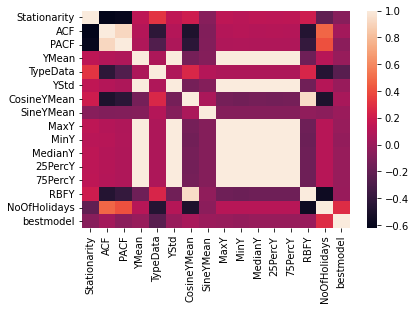

In [ ]:
#correlation between features
import seaborn as sns
sns.heatmap(corr)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
mldata1.columns

Index(['Stationarity', 'ACF', 'PACF', 'YMean', 'TypeData', 'YStd',
       'CosineYMean', 'SineYMean', 'MaxY', 'MinY', 'MedianY', '25PercY',
       '75PercY', 'RBFY', 'NoOfHolidays', 'bestmodel'],
      dtype='object')

In [ ]:
#converting dataset to a csv file for future use
mldata1.to_csv('classifier.csv', encoding = 'utf-8-sig') 

In [ ]:
from google.colab import files
files.download('classifier.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
classifier = pd.read_csv('/content/classifier.csv')

In [ ]:
classifier.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
classifier.head()

,Stationarity,ACF,PACF,YMean,TypeData,YStd,CosineYMean,SineYMean,MaxY,MinY,MedianY,25PercY,75PercY,RBFY,NoOfHolidays,bestmodel
0,0,0.940889,0.668269,4.175945,1,2.172401,-0.345622,0.062732,13.420000,1.630000,3.500000,2.645000,5.290000,2.930100e-02,23,2
1,0,0.886817,0.779763,240900.606897,1,34409.783380,0.046235,-0.007028,318991.000000,161926.000000,239212.000000,221130.000000,265615.000000,0.000000e+00,11,1
2,1,0.408852,0.320756,8.360000,1,0.637704,-0.410425,0.708783,9.000000,7.000000,8.000000,8.000000,9.000000,1.837868e-12,3,0
3,0,0.571069,0.505242,0.000269,1,0.000279,1.000000,0.000269,0.000993,0.000000,0.000150,0.000079,0.000361,9.999999e-01,3,0
4,0,0.734283,0.559734,0.090922,1,0.017409,0.995727,0.090783,0.123207,0.068606,0.087172,0.079441,0.104878,9.957344e-01,2,0


In [ ]:
x = classifier.copy()

In [ ]:
x.in

In [ ]:
x.head()

,Stationarity,ACF,PACF,YMean,TypeData,YStd,CosineYMean,SineYMean,MaxY,MinY,MedianY,25PercY,75PercY,RBFY,NoOfHolidays,bestmodel
0,0,0.940889,0.668269,4.175945,1,2.172401,-0.345622,0.062732,13.420000,1.630000,3.500000,2.645000,5.290000,2.930100e-02,23,2
1,0,0.886817,0.779763,240900.606897,1,34409.783380,0.046235,-0.007028,318991.000000,161926.000000,239212.000000,221130.000000,265615.000000,0.000000e+00,11,1
2,1,0.408852,0.320756,8.360000,1,0.637704,-0.410425,0.708783,9.000000,7.000000,8.000000,8.000000,9.000000,1.837868e-12,3,0
3,0,0.571069,0.505242,0.000269,1,0.000279,1.000000,0.000269,0.000993,0.000000,0.000150,0.000079,0.000361,9.999999e-01,3,0
4,0,0.734283,0.559734,0.090922,1,0.017409,0.995727,0.090783,0.123207,0.068606,0.087172,0.079441,0.104878,9.957344e-01,2,0


In [ ]:
y1 = classifier['bestmodel']

In [ ]:
y1

0     2
1     1
2     0
3     0
4     0
5     1
6     1
7     2
8     1
9     2
10    0
11    1
12    1
13    2
14    0
15    0
16    0
17    0
18    2
19    1
20    0
21    0
22    2
23    2
24    1
25    0
26    1
27    0
28    2
29    2
30    0
31    1
32    2
33    2
34    2
35    2
Name: bestmodel, dtype: int64

In [ ]:
x.drop('bestmodel', axis = 1, inplace = True)

In [ ]:
x.head()

,Stationarity,ACF,PACF,YMean,TypeData,YStd,CosineYMean,SineYMean,MaxY,MinY,MedianY,25PercY,75PercY,RBFY,NoOfHolidays
0,0,0.940889,0.668269,4.175945,1,2.172401,-0.345622,0.062732,13.420000,1.630000,3.500000,2.645000,5.290000,2.930100e-02,23
1,0,0.886817,0.779763,240900.606897,1,34409.783380,0.046235,-0.007028,318991.000000,161926.000000,239212.000000,221130.000000,265615.000000,0.000000e+00,11
2,1,0.408852,0.320756,8.360000,1,0.637704,-0.410425,0.708783,9.000000,7.000000,8.000000,8.000000,9.000000,1.837868e-12,3
3,0,0.571069,0.505242,0.000269,1,0.000279,1.000000,0.000269,0.000993,0.000000,0.000150,0.000079,0.000361,9.999999e-01,3
4,0,0.734283,0.559734,0.090922,1,0.017409,0.995727,0.090783,0.123207,0.068606,0.087172,0.079441,0.104878,9.957344e-01,2


In [ ]:
y1.value_counts()

2    13
0    13
1    10
Name: bestmodel, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.04)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#random forest classifier for classification
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print("Accuracy of our random forest classifier is:",accuracy_score(y_test,y_pred)*100,"%")

Accuracy of our random forest classifier is: 100.0 %


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1, 0],
       [0, 1]])

In [ ]:
import pickle

In [ ]:
y_train.value_counts()

0    12
2    12
1    10
Name: bestmodel, dtype: int64

In [ ]:
#pickling model for future uses
pickle.dump(classifier, open('classifier.pkl','wb'))